In [6]:
%run potclass.ipynb
%run MainFuncs.ipynb
from math import log
from scipy.stats import linregress
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
import re
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import * # plotting library
import numpy as np
import pylab as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import *
import pickle
from IPython.display import Latex
import imageio
from pandas import Series, DataFrame

# Structure

All the main functions are put in the file MainFuncs.ipynb. Each function has a decriptory paragraph that can be accesed by calling the help function:

In [7]:
help(plot_ground_wavefunc)

Help on function plot_ground_wavefunc in module __main__:

plot_ground_wavefunc(V, L, exp=2)
    Plots the wavefunction of the groundstate for given input values.
    Parameters:
        - V: Potential for which to compute the problem.
        - L: Length to use for the computation.
        - exp (default 2): Power to which the wavefunction will be put.



The list of functions are:
    - PlotAndCompare
    - detect_crossing
    - compute_Vc
    - plot_alpha
    - fit_nu
    - plot_nu
    - plot_nuprime
    - Bin
    - N
    - BoxDim
    - IPRq_L_V
    - tauq
    - cuts_tauq
    - plot_tauq
    - plot_ground_wavefunc

# $\text{IPR}_q$ calculation 

The $\text{IPR}_q$ calculation has been included in the potclass file all relevant segments are denoted by:
#<----------- IPR_q

A model way to compute $\text{IPR}_q$ is as follows:

In [8]:
def compute_IPRq(V1, V2, q, phi = 4, r = (np.sqrt(5)-1)/2, dx = 1/100, L = 100, nm = 2):
    '''
        Computes the IPR for all the required eigenstates of a given setting.
        PARAMETERS:
            - V1: potential of first cosine
            - V2: potential of second cosine
            - q: Which IPR is required
            - phi: phase offset (default 4)
            - r: frequency ratio in between the two cosines (default golden ratio)
            - dx: numerical lattice size for discretization (default 1/100)
            - L: length of the problem (default 100)
            - nm: number of required eigenstates to compute (default 2, if a number smaller than 0 is
                  passed then all eigenstates will be computed)
    '''
    if nm > 0:
        Lattice = pot.wVsin(phi, r, dx, L, V1, V2, "L", "lnrhighbound", "nm_{}".format(nm), "q_{}".format(q))
    else:
        Lattice = pot.wVsin(phi, r, dx, L, V1, V2, "L", "lnrhighbound", "q_{}".format(q))
    return Lattice.IPR

# Computed Results:

All the main results that we have computed are here.

## Computation of $V_c$ from IPR

The code for the computation of $V_c$ is as follows:

In [9]:
with open('./Results/V1=V2=V_restricted_L=50,200,1000,10000,Vtab=x,IPR=y', 'rb') as f:
    Vtab_restricted, IPR_restricted = pickle.load(f)
    Ltab = [50, 200, 1000, 10000]

for L in Ltab:
    IPR_restricted[L] = np.array(IPR_restricted[L])

crossing = detect_crossing(Ltab, IPR_restricted)
print(crossing)
Vc, err = compute_Vc(Vtab_restricted, crossing)
print(Vc)

[67, 67, 67]


<IPython.core.display.Latex object>

1.1086868686868687


The names of all the files for the different initial conditions are as follows:
 - V1=8_L=50,200,1000,10000,V2=x,IPR=y
 - V1=30_L=50,200,1000,10000,V2=x,IPR=y
 - V1=V2=V_L=50,200,1000,10000,Vtab=x,IPR=y
 - V1=V2=V_restricted_L=50,200,1000,10000,Vtab=x,IPR=y
 - V2=7_L=50,200,1000,10000,V1=x,IPR=y

Everything should be explained in the names (restricted means that the IPR is computed in a tighter region around the critical point).

## $\tau_q$ calculation

The computation for $\tau_q$ is done as follows (all the functions used are from MainFuncs.ipynb):

In [ ]:
# -------------- Problem Setting ------------------------
LtabLog = np.linspace(np.log10(50), np.log10(1000), 1000)
Ltab = np.power(10, LtabLog)
Vtab = np.linspace(1.1, 1.12, 100)
#--------------------------------------------------------

#--------------- IPR_q computation ----------------------
# WARINING VERY LONG COMPUTATION
IPRq = IPRq_L_V(q = 2, Ltab = Ltab, Vtab = Vtab)

0%, 

In [10]:
help(tauq)

Help on function tauq in module __main__:

tauq(Ltab, Vtab, IPRq, p1=0, p2=1)
    Function that computes tau_q from the dictionnary of IPR_q, given a certain cut of Ltab.
    Parameters:
        - Ltab: Values of L for which the IPR was computed
        - Vtab: Values of V for which the IPR was computed
        - IPRq: Dictionnary that maps a given potential to a list of IPR where the i-th item of the
                list corresponds to the IPR of the i-th length in Ltab.
        - p1: Lower bound of Ltab defining the region in which we perform the fit to compute tau (
              default is 0%)
        - p2: Upper bound of Ltab defining the region in which we perform the fit to compute tau (
              default is 100%)



In [32]:
# WARINING VERY LONG COMPUTATION
tau, err_tau = tauq(Ltab, Vtab, IPRq, p1 = 0, p2 = 1)

The computation leading to the whole graph of values is succintly summarized in the following function:

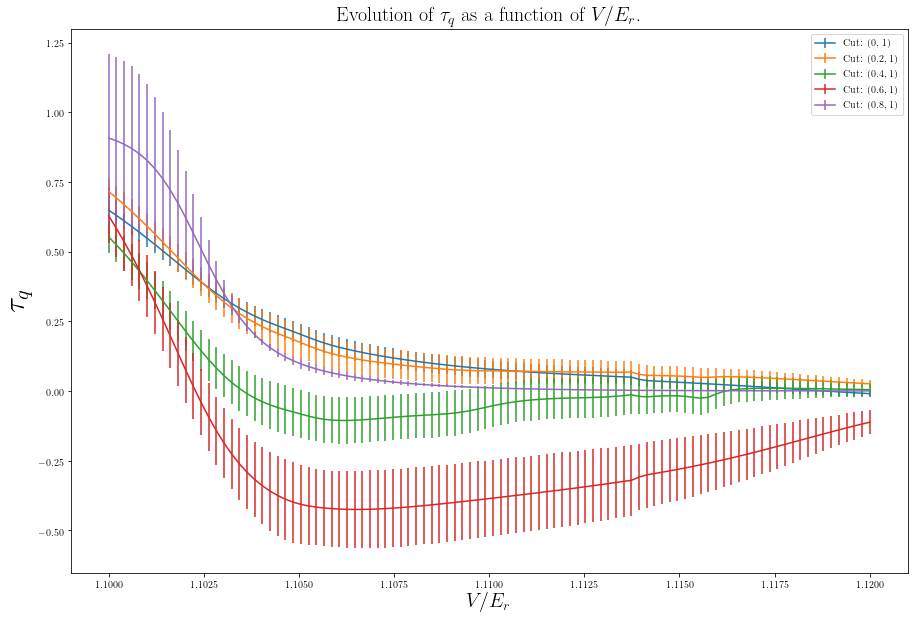

In [36]:
tauTab, err_tauTab = plot_tauq(Ltab, Vtab, IPRq, cuts = [(0, 1), (0.2, 1), (0.4, 1), (0.6, 1), (0.8, 1)])

## Comparison of different $\tau_q$.

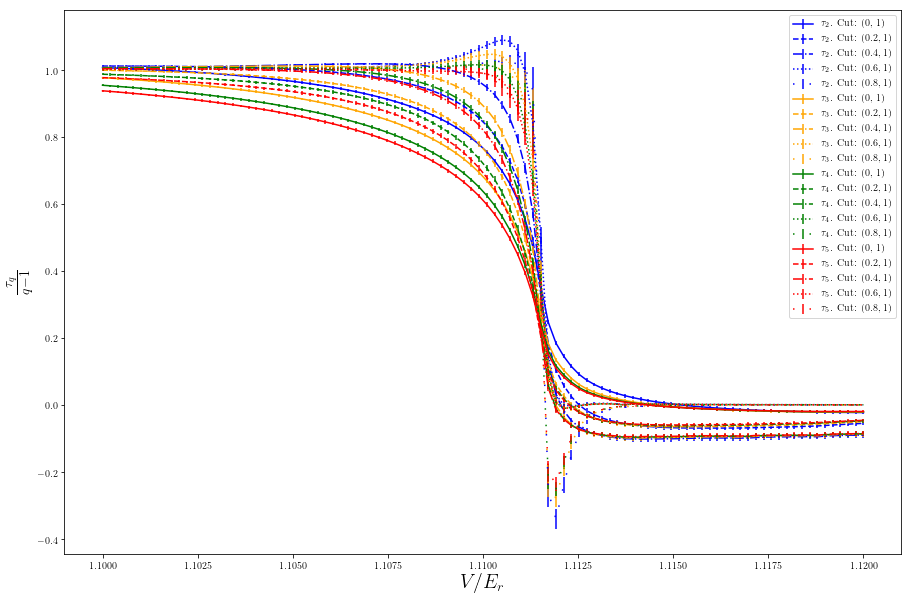

In [11]:
IPRq = {}
tau = {}
err_tau = {}
cuts = [(0, 1), (0.2, 1), (0.4, 1), (0.6, 1), (0.8, 1)]
colors = ['blue', 'orange', 'green', 'red']
linestyles = ['solid', '--', '-.', 'dotted', (0, (1, 10))]

fig = plt.figure(figsize = (15,10))

for i in range(2,6):
    with open('./Results/tau_{}'.format(i), 'rb') as f:
        Vtab, Ltab, IPRq[i] = pickle.load(f)
    tau[i], err_tau[i] = cuts_tauq(Ltab, Vtab, IPRq[i], 
                                   cuts = cuts)
    for j in range(len(cuts)):
        tau[i][j], err_tau[i][j] = np.array(tau[i][j]), np.array(err_tau[i][j])
        plt.errorbar(Vtab, tau[i][j]/(i-1), yerr = err_tau[i][j]/(i-1), 
                     label = r'$\tau_{0}$. Cut: ({1}, {2})'.format(i, cuts[j][0], cuts[j][1]),
                    color = colors[i-2], linestyle = linestyles[j])

plt.xlabel(r'$V/E_r$', size = 20)
plt.ylabel(r'$\frac{\tau_q}{q-1}$', size = 20)
plt.legend()
plt.show()

## Typical wavefunctions

All typical wavefunction data is stored in the files named in the following way:
 - {Type of Wavefunction}_State_L={Value of L used for computation}_exp={Power to which the wavefunction was put}

All the files can be loaded in the following way:

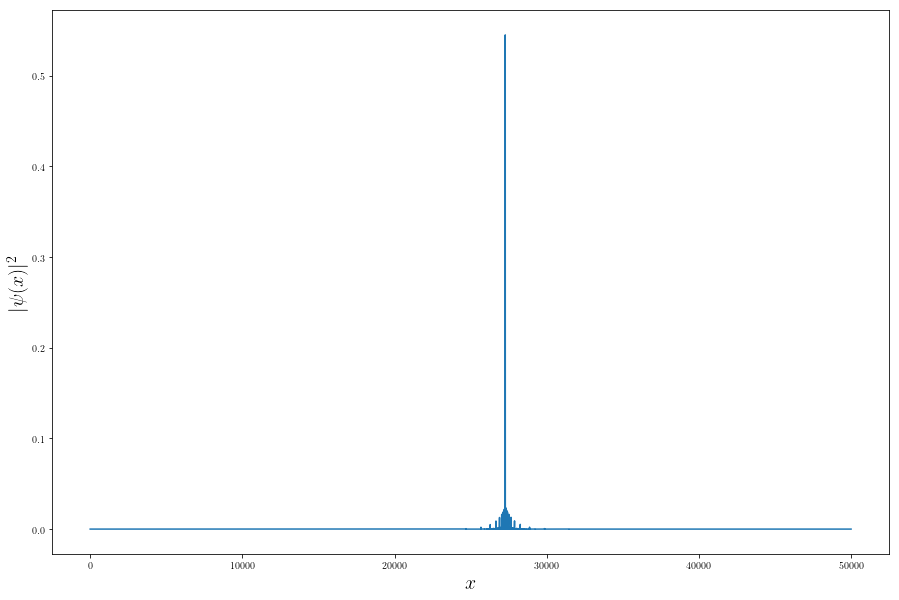

In [15]:
with open('./Results/Localized_State_L=50000_exp=2', 'rb') as f:
    xTab, yTab = pickle.load(f)

fig = plt.figure(figsize=(15,10))
plt.xlabel(r'$x$', size = 20)
plt.ylabel(r'$|\psi(x)|^2$', size = 20)
plt.plot(xTab, yTab)
plt.show()

Otherwise one can compute the wavefunction of any ground state elevated to any power with the following function from MainFuncs.ipynb:

c:\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


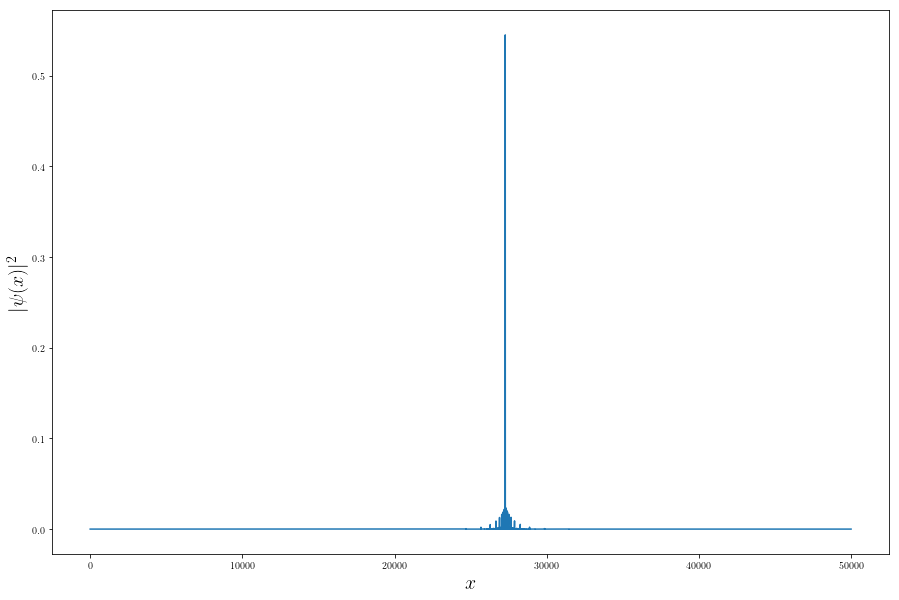

c:\python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


In [13]:
xTab, yTab = plot_ground_wavefunc(1.112, 50000, exp = 2)

The values used for the computation of every files where the following (for all computations I used $\phi = 4$, $r = \frac{\sqrt{5}-1}{2}$ and $dx = 1/100$):
 - Extended_State_L=50000: $V = 1.1107070707070708$, $L = 50000$, $exp = 2$
 - Extended_State_L=50000_exp=4: $V = 1.1107070707070708$, $L = 50000$, $exp = 4$
 - Fractal_State_L=50000_exp=2: $V = 1.1115151515151516$, $L = 50000$, $exp = 2$
 - Fractal_State_L=50000_exp=4: $V = 1.1115151515151516$, $L = 50000$, $exp = 4$
 - Fractal_State_L=75000_exp=4: $V = 1.1115151515151516$, $L = 75000$, $exp = 4$
 - Fractal_State_L=100000_exp=4: $V = 1.1115151515151516$, $L = 100000$, $exp = 4$
 - Fractal_State_L=1000000_exp=4: $V = 1.1115151515151516$, $L = 1000000$, $exp = 4$
 - Localized_State_L=1000_exp=2: $V = 1.112$, $L = 1000$, $exp = 2$
 - Localized_State_L=50000_exp=2: $V = 1.112$, $L = 50000$, $exp = 2$

## Zooms of Fractal wavefunction

The zooms of the fractal wavefunction were obtained with the following paramters:
 - $\phi = 4$, $r = \frac{\sqrt{5} - 1}{2}$, $dx = 1/100$
 - $V = 1.11152$
 - $L = 50000$
 - Zoom 1: $x_\text{min} = 17275.0$ and $x_\text{max} = 37275.0$ 
 - Zoom 2: $x_\text{min} = 12500$ and $x_\text{max} = 20500$
 - Zoom 3: $x_\text{min} = 21490$ and $x_\text{max} = 24690$
 
Note that these values where chosen arbitrarly by eye to try and get as similar as possible but notice that the ranges of xlim pass from $20 \,000$ to $8\,000$ to $3\,200$ i.e a division by $2.5 = 1/0.4 \approx 1/\tau_c$ where I called $\tau_c$ the critical value of $\tau$ for which the crossing happens.